### Group Members: Amogh Nagarajan, Chris Shortell, Nikhil Singh

### How the Three Point Shot has Influenced the NBA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

### Introduction

Since the creation of basketball, the sport has undergone lots of change which include rule changes and new tactics applied by each team. The 3 point line was brought into the NBA during the 1980 season, this rule change had a huge impact on how teams strategized and played each game. Recently the 3 point shot has increased in popularity and has lead coaches and analysts to believe that the 3 point shot has a huge impact on the success of an NBA team in today's current era. 

Our group wanted to explore how 3 point shooting affects the success of a team over the course of a season. More specifically how does the quantity of three point shots attempted per game and 3 point percentage affect win percentage.

To understand the general trend of the NBA we will be analyzing the average amount of 3 pointers attempted and made by all teams in the NBA. This will show if NBA teams are shooting more or less 3’s now vs in the past. 

With an understanding of the general trend of the NBA we will be able to apply that and analyze how the amount of 3 pointers attempted and 3 point percentage affect win percentage. 


### Data Collection

For our data collection, we decided to use Basketball Reference as our main site to get data about every team's stats during the season. We decided to pick seasons starting at 1996-1997 and ending at 2018-2019, while not including 1998-1999 and 2011-2012 seasons since those were lockout seasons and less games were played that year which could inflate some stat for the teams due to the less games that were played. To properly get the data that we needed for our project, we decided to get three different CSV files per season. The first dataset we got for the season was team stats per game, which we called table_year. This data set has statistics that the team had per game for the 82 game season. Some of the statistics that the table game were points scored, three pointers made, assists, rebounds. Pretty much any single game basketball stat was provided in this table. 

The second data set we had for each year was the team stats in total which we decided to call table_year_total. This is very much the same data set as the team stats per game data set, with the only change being that this data set provided totals of each stats. Rather than giving how many points were scored per game, this data set instead gave how many points were scored totally the whole season. This was useful for us as it gave actual numbers rather than averages of stats so we could clearly see how many points were scored for example all season or how many three pointers were attempted all season. 

The third data set we had for each season was the standings data set which we called table_year_record. This data set had stats about the team's record that season and gave other stats such as home record and away record. This table was used only to get the total wins the team had this season.

In [2]:
years = ['1996-1997', '1997-1998', '1999-2000', '2000-2001', '2001-2002', '2002-2003', 
         '2003-2004', '2004-2005', '2005-2006', '2006-2007', '2007-2008', 
         '2008-2009', '2009-2010', '2010-2011', '2012-2013', '2013-2014', 
         '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019']

table_96_97 = pd.read_csv('data/1996-1997_per_game.csv')
table_96_97_total = pd.read_csv('data/1996-1997_total.csv')
table_96_97_record = pd.read_csv('data/1996-1997_standings.csv')

table_97_98 = pd.read_csv('data/1997-1998_per_game.csv')
table_97_98_total = pd.read_csv('data/1997-1998_total.csv')
table_97_98_record = pd.read_csv('data/1997-1998_standings.csv')


table_99_00 = pd.read_csv('data/1999-2000_per_game.csv')
table_99_00_total = pd.read_csv('data/1999-2000_total.csv')
table_99_00_record = pd.read_csv('data/1999-2000_standings.csv')

table_00_01 = pd.read_csv('data/2000-2001_per_game.csv')
table_00_01_total = pd.read_csv('data/2000-2001_total.csv')
table_00_01_record = pd.read_csv('data/2000-2001_standings.csv')

table_01_02 = pd.read_csv('data/2001-2002_per_game.csv')
table_01_02_total = pd.read_csv('data/2001-2002_total.csv')
table_01_02_record = pd.read_csv('data/2001-2002_standings.csv')

table_02_03 = pd.read_csv('data/2002-2003_per_game.csv')
table_02_03_total = pd.read_csv('data/2002-2003_total.csv')
table_02_03_record = pd.read_csv('data/2002-2003_standings.csv')

table_03_04 = pd.read_csv('data/2003-2004_per_game.csv')
table_03_04_total = pd.read_csv('data/2003-2004_total.csv')
table_03_04_record = pd.read_csv('data/2003-2004_standings.csv')

table_04_05 = pd.read_csv('data/2004-2005_per_game.csv')
table_04_05_total = pd.read_csv('data/2004-2005_total.csv')
table_04_05_record = pd.read_csv('data/2004-2005_standings.csv')

table_05_06 = pd.read_csv('data/2005-2006_per_game.csv')
table_05_06_total = pd.read_csv('data/2005-2006_total.csv')
table_05_06_record = pd.read_csv('data/2005-2006_standings.csv')

table_06_07 = pd.read_csv('data/2006-2007_per_game.csv')
table_06_07_total = pd.read_csv('data/2006-2007_total.csv')
table_06_07_record = pd.read_csv('data/2006-2007_standings.csv')

table_07_08 = pd.read_csv('data/2007-2008_per_game.csv')
table_07_08_total = pd.read_csv('data/2007-2008_total.csv')
table_07_08_record = pd.read_csv('data/2007-2008_standings.csv')

table_08_09 = pd.read_csv('data/2008-2009_per_game.csv')
table_08_09_total = pd.read_csv('data/2008-2009_total.csv')
table_08_09_record = pd.read_csv('data/2008-2009_standings.csv')

table_09_10 = pd.read_csv('data/2009-2010_per_game.csv')
table_09_10_total = pd.read_csv('data/2009-2010_total.csv')
table_09_10_record = pd.read_csv('data/2009-2010_standings.csv')

table_10_11 = pd.read_csv('data/2010-2011_per_game.csv')
table_10_11_total = pd.read_csv('data/2010-2011_total.csv')
table_10_11_record = pd.read_csv('data/2010-2011_standings.csv')

table_12_13 = pd.read_csv('data/2012-2013_per_game.csv')
table_12_13_total = pd.read_csv('data/2012-2013_total.csv')
table_12_13_record = pd.read_csv('data/2012-2013_standings.csv')

table_13_14 = pd.read_csv('data/2013-2014_per_game.csv')
table_13_14_total = pd.read_csv('data/2013-2014_total.csv')
table_13_14_record = pd.read_csv('data/2013-2014_standings.csv')

table_14_15 = pd.read_csv('data/2014-2015_per_game.csv')
table_14_15_total = pd.read_csv('data/2014-2015_total.csv')
table_14_15_record = pd.read_csv('data/2014-2015_standings.csv')

table_15_16 = pd.read_csv('data/2015-2016_per_game.csv')
table_15_16_total = pd.read_csv('data/2015-2016_total.csv')
table_15_16_record = pd.read_csv('data/2015-2016_standings.csv')

table_16_17 = pd.read_csv('data/2016-2017_per_game.csv')
table_16_17_total = pd.read_csv('data/2016-2017_total.csv')
table_16_17_record = pd.read_csv('data/2016-2017_standings.csv')

table_17_18 = pd.read_csv('data/2017-2018_per_game.csv')
table_17_18_total = pd.read_csv('data/2017-2018_total.csv')
table_17_18_record = pd.read_csv('data/2017-2018_standings.csv')

table_18_19 = pd.read_csv('data/2018-2019_per_game.csv')
table_18_19_total = pd.read_csv('data/2018-2019_total.csv')
table_18_19_record = pd.read_csv('data/2018-2019_standings.csv')

In [3]:
table_05_06.tail(10)


,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
21,22.0,Orlando Magic,82,242.7,35.5,75.2,0.472,3.6,9.7,0.376,...,0.730,10.9,29.3,40.2,18.2,6.5,4.4,15.1,23.3,94.9
22,23.0,Indiana Pacers*,82,240.6,34.0,76.5,0.444,6.5,18.7,0.349,...,0.737,11.0,31.2,42.2,19.9,7.3,5.0,15.3,22.2,93.9
23,24.0,New Jersey Nets*,82,241.2,33.9,77.0,0.440,5.8,17.6,0.330,...,0.758,10.0,31.0,41.0,23.0,6.8,3.4,13.6,23.2,93.8
24,25.0,New Orleans/Oklahoma City Hornets,82,241.5,34.5,78.4,0.440,3.7,10.8,0.339,...,0.758,11.2,29.0,40.2,18.5,7.5,3.8,13.4,21.8,92.8
25,26.0,Utah Jazz,82,242.4,33.5,75.7,0.442,3.8,11.3,0.336,...,0.719,13.1,29.0,42.1,21.6,6.4,6.0,15.7,24.8,92.4
26,27.0,Memphis Grizzlies*,82,242.1,33.5,74.7,0.448,7.2,19.2,0.374,...,0.711,10.2,29.0,39.2,19.3,7.3,5.4,13.8,21.4,92.2
27,28.0,Minnesota Timberwolves,82,242.1,35.2,77.3,0.456,3.8,11.5,0.329,...,0.758,9.9,29.5,39.4,20.9,6.8,5.7,14.5,23.0,91.7
28,29.0,Houston Rockets,82,241.8,33.0,76.2,0.433,5.7,17.2,0.332,...,0.759,10.4,31.3,41.6,19.3,7.2,3.9,14.5,22.7,90.1
29,30.0,Portland Trail Blazers,82,240.6,34.0,76.4,0.445,4.4,12.7,0.349,...,0.689,10.8,26.9,37.7,18.2,6.5,5.3,14.7,22.3,88.8
30,NaN,League Average,82,242.1,35.8,79.0,0.454,5.7,16.0,0.358,...,0.745,11.2,29.8,41.0,20.6,7.2,4.7,14.4,22.8,97.0


In [4]:
table_05_06_total.tail(10)


,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
21,22.0,Orlando Magic,82,19905,2911,6167,0.472,299,796,0.376,...,0.730,892,2402,3294,1495,532,362,1240,1908,7784
22,23.0,Indiana Pacers*,82,19730,2786,6274,0.444,536,1536,0.349,...,0.737,898,2559,3457,1631,598,409,1254,1821,7699
23,24.0,New Jersey Nets*,82,19780,2778,6317,0.440,477,1447,0.330,...,0.758,822,2539,3361,1884,558,278,1119,1903,7691
24,25.0,New Orleans/Oklahoma City Hornets,82,19805,2831,6428,0.440,300,885,0.339,...,0.758,918,2379,3297,1519,611,311,1095,1786,7611
25,26.0,Utah Jazz,82,19880,2744,6207,0.442,311,925,0.336,...,0.719,1071,2380,3451,1772,524,492,1290,2032,7573
26,27.0,Memphis Grizzlies*,82,19855,2746,6125,0.448,590,1578,0.374,...,0.711,834,2379,3213,1586,600,442,1134,1757,7558
27,28.0,Minnesota Timberwolves,82,19855,2888,6340,0.456,310,942,0.329,...,0.758,811,2422,3233,1716,559,471,1189,1889,7522
28,29.0,Houston Rockets,82,19830,2708,6252,0.433,469,1414,0.332,...,0.759,849,2565,3414,1580,588,320,1193,1863,7387
29,30.0,Portland Trail Blazers,82,19730,2791,6267,0.445,364,1042,0.349,...,0.689,886,2203,3089,1490,529,435,1205,1828,7285
30,NaN,League Average,82,19852,2939,6477,0.454,470,1310,0.358,...,0.745,916,2442,3358,1690,588,385,1182,1866,7955


In [5]:
table_05_06_record.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Pre,Post,≤3,≥10,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Detroit Pistons,64-18,37-4,27-14,39-13,25-5,14-4,13-3,12-6,...,42-9,22-9,7-4,32-8,11-2,13-2,13-2,10-3,11-5,6-4
2,2,San Antonio Spurs,63-19,34-7,29-12,21-9,42-10,9-1,5-5,7-3,...,40-12,23-7,10-2,31-11,11-3,13-4,11-3,9-2,12-4,7-3
3,3,Dallas Mavericks,60-22,34-7,26-15,23-7,37-15,7-3,7-3,9-1,...,41-11,19-11,11-6,28-10,10-4,12-4,13-2,10-1,9-8,6-3
4,4,Phoenix Suns,54-28,31-10,23-18,22-8,32-20,8-2,6-4,8-2,...,35-17,19-11,0-7,34-9,8-5,11-5,10-6,9-1,11-6,5-5
5,5,Miami Heat,52-30,31-10,21-20,35-17,17-13,13-5,9-9,13-3,...,33-20,19-10,8-4,27-11,9-6,9-7,10-5,8-2,12-3,4-7
6,6,Cleveland Cavaliers,50-32,31-10,19-22,34-18,16-14,12-6,11-5,11-7,...,31-21,19-11,9-4,20-11,10-4,8-6,8-7,6-8,10-4,8-3
7,7,Memphis Grizzlies,49-33,30-11,19-22,18-12,31-21,6-4,4-6,8-2,...,29-23,20-10,6-10,30-13,10-5,9-5,7-8,5-8,10-6,8-1
8,8,New Jersey Nets,49-33,29-12,20-21,33-19,16-14,10-6,9-9,14-4,...,28-23,21-10,8-6,21-17,7-8,10-4,6-8,8-5,12-3,6-5
9,9,Los Angeles Clippers,47-35,27-14,20-21,20-10,27-25,7-3,4-6,9-1,...,30-21,17-14,6-5,24-19,10-5,6-7,9-5,7-6,10-6,5-6


### Data Processing

As we can see above in the three outputs of each individual table, there is some cleaning/tidying and organizing of the data to make it more readable, and more importantly, get all the stats we are in interest of into one single table for each season. To achieve a more readable and organized dataframe per year, a number of steps shown below were taken to get this done. Looking at the team per game stats table per year, there is a league average row that is in every year's table, so we decided to remove this row from each table as we did not really need this row for our project.

In [6]:
table_96_97 = table_96_97[:-1]
table_97_98 = table_97_98[:-1]
table_99_00 = table_99_00[:-1]
table_00_01 = table_00_01[:-1]
table_01_02 = table_01_02[:-1]
table_02_03 = table_02_03[:-1]
table_03_04 = table_03_04[:-1]
table_04_05 = table_04_05[:-1]
table_05_06 = table_05_06[:-1]
table_06_07 = table_06_07[:-1]
table_07_08 = table_07_08[:-1]
table_08_09 = table_08_09[:-1]
table_09_10 = table_09_10[:-1]
table_10_11 = table_10_11[:-1]
table_12_13 = table_12_13[:-1]
table_13_14 = table_13_14[:-1]
table_14_15 = table_14_15[:-1]
table_15_16 = table_15_16[:-1]
table_16_17 = table_16_17[:-1]
table_17_18 = table_17_18[:-1]
table_18_19 = table_18_19[:-1]

After taking out the league average row in each table, we added columns in the stats per game table and took all the stats that we were interested in. We added columns for year, total points, field goals and attempts, three points and attempts, and finally wins. We also decided to rename the orgianl column names in the original team per game stats table to have them say, stat/G so we can differntiate from what is total stats and stats per game. For example, in the original table, the PTS column was changed to PTS/G and this was done for every stat we wanted from the original total stats table and for every season.

In [7]:
table_96_97['Year'] = years[0]
table_96_97 = table_96_97[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_96_97 = table_96_97.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_96_97.index += 1
table_96_97['PTS'] = 0
table_96_97['FG'] = 0
table_96_97['FGA'] = 0
table_96_97['3P'] = 0
table_96_97['3PA'] = 0
table_96_97['W'] = ''

table_97_98['Year'] = years[1]
table_97_98 = table_97_98[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_97_98 = table_97_98.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_97_98.index += 1
table_97_98['PTS'] = 0
table_97_98['FG'] = 0
table_97_98['FGA'] = 0
table_97_98['3P'] = 0
table_97_98['3PA'] = 0
table_97_98['W'] = ''

table_99_00['Year'] = years[2]
table_99_00 = table_99_00[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_99_00 = table_99_00.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_99_00.index += 1
table_99_00['PTS'] = 0
table_99_00['FG'] = 0
table_99_00['FGA'] = 0
table_99_00['3P'] = 0
table_99_00['3PA'] = 0
table_99_00['W'] = ''

table_00_01['Year'] = years[3]
table_00_01 = table_00_01[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_00_01 = table_00_01.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_00_01.index += 1
table_00_01['PTS'] = 0
table_00_01['FG'] = 0
table_00_01['FGA'] = 0
table_00_01['3P'] = 0
table_00_01['3PA'] = 0
table_00_01['W'] = ''

table_01_02['Year'] = years[4]
table_01_02 = table_01_02[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_01_02 = table_01_02.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_01_02.index += 1
table_01_02['PTS'] = 0
table_01_02['FG'] = 0
table_01_02['FGA'] = 0
table_01_02['3P'] = 0
table_01_02['3PA'] = 0
table_01_02['W'] = ''

table_02_03['Year'] = years[5]
table_02_03 = table_02_03[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_02_03 = table_02_03.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_02_03.index += 1
table_02_03['PTS'] = 0
table_02_03['FG'] = 0
table_02_03['FGA'] = 0
table_02_03['3P'] = 0
table_02_03['3PA'] = 0
table_02_03['W'] = ''

table_03_04['Year'] = years[6]
table_03_04 = table_03_04[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_03_04 = table_03_04.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_03_04.index += 1
table_03_04['PTS'] = 0
table_03_04['FG'] = 0
table_03_04['FGA'] = 0
table_03_04['3P'] = 0
table_03_04['3PA'] = 0
table_03_04['W'] = ''

table_04_05['Year'] = years[7]
table_04_05 = table_04_05[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_04_05 = table_04_05.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_04_05.index += 1
table_04_05['PTS'] = 0
table_04_05['FG'] = 0
table_04_05['FGA'] = 0
table_04_05['3P'] = 0
table_04_05['3PA'] = 0
table_04_05['W'] = ''

table_05_06['Year'] = years[8]
table_05_06 = table_05_06[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_05_06 = table_05_06.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_05_06.index += 1
table_05_06['PTS'] = 0
table_05_06['FG'] = 0
table_05_06['FGA'] = 0
table_05_06['3P'] = 0
table_05_06['3PA'] = 0
table_05_06['W'] = ''


table_06_07['Year'] = years[9]
table_06_07 = table_06_07[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_06_07 = table_06_07.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_06_07.index += 1
table_06_07['PTS'] = 0
table_06_07['FG'] = 0
table_06_07['FGA'] = 0
table_06_07['3P'] = 0
table_06_07['3PA'] = 0
table_06_07['W'] = ''

table_07_08['Year'] = years[10]
table_07_08 = table_07_08[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_07_08 = table_07_08.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_07_08.index += 1
table_07_08['PTS'] = 0
table_07_08['FG'] = 0
table_07_08['FGA'] = 0
table_07_08['3P'] = 0
table_07_08['3PA'] = 0
table_07_08['W'] = ''

table_08_09['Year'] = years[11]
table_08_09 = table_08_09[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_08_09 = table_08_09.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_08_09.index += 1
table_08_09['PTS'] = 0
table_08_09['FG'] = 0
table_08_09['FGA'] = 0
table_08_09['3P'] = 0
table_08_09['3PA'] = 0
table_08_09['W'] = ''

table_09_10['Year'] = years[12]
table_09_10 = table_09_10[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_09_10 = table_09_10.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_09_10.index += 1
table_09_10['PTS'] = 0
table_09_10['FG'] = 0
table_09_10['FGA'] = 0
table_09_10['3P'] = 0
table_09_10['3PA'] = 0
table_09_10['W'] = ''

table_10_11['Year'] = years[13]
table_10_11 = table_10_11[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_10_11 = table_10_11.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_10_11.index += 1
table_10_11['PTS'] = 0
table_10_11['FG'] = 0
table_10_11['FGA'] = 0
table_10_11['3P'] = 0
table_10_11['3PA'] = 0
table_10_11['W'] = ''

table_12_13['Year'] = years[14]
table_12_13 = table_12_13[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_12_13 = table_12_13.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_12_13.index += 1
table_12_13['PTS'] = 0
table_12_13['FG'] = 0
table_12_13['FGA'] = 0
table_12_13['3P'] = 0
table_12_13['3PA'] = 0
table_12_13['W'] = ''

table_13_14['Year'] = years[15]
table_13_14 = table_13_14[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_13_14 = table_13_14.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_13_14.index += 1
table_13_14['PTS'] = 0
table_13_14['FG'] = 0
table_13_14['FGA'] = 0
table_13_14['3P'] = 0
table_13_14['3PA'] = 0
table_13_14['W'] = ''

table_14_15['Year'] = years[16]
table_14_15 = table_14_15[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_14_15 = table_14_15.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_14_15.index += 1
table_14_15['PTS'] = 0
table_14_15['FG'] = 0
table_14_15['FGA'] = 0
table_14_15['3P'] = 0
table_14_15['3PA'] = 0
table_14_15['W'] = ''

table_15_16['Year'] = years[17]
table_15_16 = table_15_16[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_15_16 = table_15_16.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_15_16.index += 1
table_15_16['PTS'] = 0
table_15_16['FG'] = 0
table_15_16['FGA'] = 0
table_15_16['3P'] = 0
table_15_16['3PA'] = 0
table_15_16['W'] = ''

table_16_17['Year'] = years[18]
table_16_17 = table_16_17[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_16_17 = table_16_17.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_16_17.index += 1
table_16_17['PTS'] = 0
table_16_17['FG'] = 0
table_16_17['FGA'] = 0
table_16_17['3P'] = 0
table_16_17['3PA'] = 0
table_16_17['W'] = ''

table_17_18['Year'] = years[19]
table_17_18 = table_17_18[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_17_18 = table_17_18.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_17_18.index += 1
table_17_18['PTS'] = 0
table_17_18['FG'] = 0
table_17_18['FGA'] = 0
table_17_18['3P'] = 0
table_17_18['3PA'] = 0
table_17_18['W'] = ''

table_18_19['Year'] = years[20]
table_18_19 = table_18_19[['Team', 'Year', 'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%']]
table_18_19 = table_18_19.rename(columns={'PTS':'PTS/G', 'FG':'FG/G', 'FGA':'FGA/G', '3P':'3P/G', '3PA':'3PA/G', '3P%':'3P%/G'})
table_18_19.index += 1
table_18_19['PTS'] = 0
table_18_19['FG'] = 0
table_18_19['FGA'] = 0
table_18_19['3P'] = 0
table_18_19['3PA'] = 0
table_18_19['W'] = ''

In [8]:
table_05_06.head()

,Team,Year,PTS/G,FG/G,FGA/G,FG%,3P/G,3PA/G,3P%/G,PTS,FG,FGA,3P,3PA,W
1,Phoenix Suns*,2005-2006,108.4,41.8,87.4,0.479,10.2,25.6,0.399,0,0,0,0,0,
2,Seattle SuperSonics,2005-2006,102.6,37.5,81.8,0.459,7.4,19.9,0.371,0,0,0,0,0,
3,Washington Wizards*,2005-2006,101.7,36.3,81.2,0.447,6.1,17.0,0.357,0,0,0,0,0,
4,Toronto Raptors,2005-2006,101.1,36.7,81.0,0.454,7.4,19.8,0.375,0,0,0,0,0,
5,Denver Nuggets*,2005-2006,100.3,37.5,81.4,0.461,4.3,13.1,0.325,0,0,0,0,0,


After the columns were updated and all the desired columns were taken for each year, we wanted to get the data from total stats table per year and add it to the stats per game table. In order to do this we iterrated over the rows of each of the total stats table for each year, and got the desired values for each column and set it to the correct row and column for each team. This process was done for each season. At the end of this step, all columns in orginal stats per game table were filled for each team accepts the wins.

In [9]:
counter = 0
for i, row in table_96_97.iterrows():
    table_96_97.iat[i - 1,9] = table_96_97_total.iloc[counter]['PTS']
    table_96_97.iat[i - 1,10] = table_96_97_total.iloc[counter]['FG']
    table_96_97.iat[i - 1,11] = table_96_97_total.iloc[counter]['FGA']
    table_96_97.iat[i - 1,12] = table_96_97_total.iloc[counter]['3P']
    table_96_97.iat[i - 1,13] = table_96_97_total.iloc[counter]['3PA']
    counter+=1
    
counter = 0
for i, row in table_97_98.iterrows():
    table_97_98.iat[i - 1,9] = table_97_98_total.iloc[counter]['PTS']
    table_97_98.iat[i - 1,10] = table_97_98_total.iloc[counter]['FG']
    table_97_98.iat[i - 1,11] = table_97_98_total.iloc[counter]['FGA']
    table_97_98.iat[i - 1,12] = table_97_98_total.iloc[counter]['3P']
    table_97_98.iat[i - 1,13] = table_97_98_total.iloc[counter]['3PA']
    counter+=1
    
counter = 0
for i, row in table_99_00.iterrows():
    table_99_00.iat[i - 1,9] = table_99_00_total.iloc[counter]['PTS']
    table_99_00.iat[i - 1,10] = table_99_00_total.iloc[counter]['FG']
    table_99_00.iat[i - 1,11] = table_99_00_total.iloc[counter]['FGA']
    table_99_00.iat[i - 1,12] = table_99_00_total.iloc[counter]['3P']
    table_99_00.iat[i - 1,13] = table_99_00_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_00_01.iterrows():
    table_00_01.iat[i - 1,9] = table_00_01_total.iloc[counter]['PTS']
    table_00_01.iat[i - 1,10] = table_00_01_total.iloc[counter]['FG']
    table_00_01.iat[i - 1,11] = table_00_01_total.iloc[counter]['FGA']
    table_00_01.iat[i - 1,12] = table_00_01_total.iloc[counter]['3P']
    table_00_01.iat[i - 1,13] = table_00_01_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_01_02.iterrows():
    table_01_02.iat[i - 1,9] = table_01_02_total.iloc[counter]['PTS']
    table_01_02.iat[i - 1,10] = table_01_02_total.iloc[counter]['FG']
    table_01_02.iat[i - 1,11] = table_01_02_total.iloc[counter]['FGA']
    table_01_02.iat[i - 1,12] = table_01_02_total.iloc[counter]['3P']
    table_01_02.iat[i - 1,13] = table_01_02_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_02_03.iterrows():
    table_02_03.iat[i - 1,9] = table_02_03_total.iloc[counter]['PTS']
    table_02_03.iat[i - 1,10] = table_02_03_total.iloc[counter]['FG']
    table_02_03.iat[i - 1,11] = table_02_03_total.iloc[counter]['FGA']
    table_02_03.iat[i - 1,12] = table_02_03_total.iloc[counter]['3P']
    table_02_03.iat[i - 1,13] = table_02_03_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_03_04.iterrows():
    table_03_04.iat[i - 1,9] = table_03_04_total.iloc[counter]['PTS']
    table_03_04.iat[i - 1,10] = table_03_04_total.iloc[counter]['FG']
    table_03_04.iat[i - 1,11] = table_03_04_total.iloc[counter]['FGA']
    table_03_04.iat[i - 1,12] = table_03_04_total.iloc[counter]['3P']
    table_03_04.iat[i - 1,13] = table_03_04_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_04_05.iterrows():
    table_04_05.iat[i - 1,9] = table_04_05_total.iloc[counter]['PTS']
    table_04_05.iat[i - 1,10] = table_04_05_total.iloc[counter]['FG']
    table_04_05.iat[i - 1,11] = table_04_05_total.iloc[counter]['FGA']
    table_04_05.iat[i - 1,12] = table_04_05_total.iloc[counter]['3P']
    table_04_05.iat[i - 1,13] = table_04_05_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_05_06.iterrows():
    table_05_06.iat[i - 1,9] = table_05_06_total.iloc[counter]['PTS']
    table_05_06.iat[i - 1,10] = table_05_06_total.iloc[counter]['FG']
    table_05_06.iat[i - 1,11] = table_05_06_total.iloc[counter]['FGA']
    table_05_06.iat[i - 1,12] = table_05_06_total.iloc[counter]['3P']
    table_05_06.iat[i - 1,13] = table_05_06_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_06_07.iterrows():
    table_06_07.iat[i - 1,9] = table_06_07_total.iloc[counter]['PTS']
    table_06_07.iat[i - 1,10] = table_06_07_total.iloc[counter]['FG']
    table_06_07.iat[i - 1,11] = table_06_07_total.iloc[counter]['FGA']
    table_06_07.iat[i - 1,12] = table_06_07_total.iloc[counter]['3P']
    table_06_07.iat[i - 1,13] = table_06_07_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_07_08.iterrows():
    table_07_08.iat[i - 1,9] = table_07_08_total.iloc[counter]['PTS']
    table_07_08.iat[i - 1,10] = table_07_08_total.iloc[counter]['FG']
    table_07_08.iat[i - 1,11] = table_07_08_total.iloc[counter]['FGA']
    table_07_08.iat[i - 1,12] = table_07_08_total.iloc[counter]['3P']
    table_07_08.iat[i - 1,13] = table_07_08_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_08_09.iterrows():
    table_08_09.iat[i - 1,9] = table_08_09_total.iloc[counter]['PTS']
    table_08_09.iat[i - 1,10] = table_08_09_total.iloc[counter]['FG']
    table_08_09.iat[i - 1,11] = table_08_09_total.iloc[counter]['FGA']
    table_08_09.iat[i - 1,12] = table_08_09_total.iloc[counter]['3P']
    table_08_09.iat[i - 1,13] = table_08_09_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_09_10.iterrows():
    table_09_10.iat[i - 1,9] = table_09_10_total.iloc[counter]['PTS']
    table_09_10.iat[i - 1,10] = table_09_10_total.iloc[counter]['FG']
    table_09_10.iat[i - 1,11] = table_09_10_total.iloc[counter]['FGA']
    table_09_10.iat[i - 1,12] = table_09_10_total.iloc[counter]['3P']
    table_09_10.iat[i - 1,13] = table_09_10_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_10_11.iterrows():
    table_10_11.iat[i - 1,9] = table_10_11_total.iloc[counter]['PTS']
    table_10_11.iat[i - 1,10] = table_10_11_total.iloc[counter]['FG']
    table_10_11.iat[i - 1,11] = table_10_11_total.iloc[counter]['FGA']
    table_10_11.iat[i - 1,12] = table_10_11_total.iloc[counter]['3P']
    table_10_11.iat[i - 1,13] = table_10_11_total.iloc[counter]['3PA']
    counter+=1
    
counter = 0
for i, row in table_12_13.iterrows():
    table_12_13.iat[i - 1,9] = table_12_13_total.iloc[counter]['PTS']
    table_12_13.iat[i - 1,10] = table_12_13_total.iloc[counter]['FG']
    table_12_13.iat[i - 1,11] = table_12_13_total.iloc[counter]['FGA']
    table_12_13.iat[i - 1,12] = table_12_13_total.iloc[counter]['3P']
    table_12_13.iat[i - 1,13] = table_12_13_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_13_14.iterrows():
    table_13_14.iat[i - 1,9] = table_13_14_total.iloc[counter]['PTS']
    table_13_14.iat[i - 1,10] = table_13_14_total.iloc[counter]['FG']
    table_13_14.iat[i - 1,11] = table_13_14_total.iloc[counter]['FGA']
    table_13_14.iat[i - 1,12] = table_13_14_total.iloc[counter]['3P']
    table_13_14.iat[i - 1,13] = table_13_14_total.iloc[counter]['3PA']
    counter+=1
    
counter = 0
for i, row in table_14_15.iterrows():
    table_14_15.iat[i - 1,9] = table_14_15_total.iloc[counter]['PTS']
    table_14_15.iat[i - 1,10] = table_14_15_total.iloc[counter]['FG']
    table_14_15.iat[i - 1,11] = table_14_15_total.iloc[counter]['FGA']
    table_14_15.iat[i - 1,12] = table_14_15_total.iloc[counter]['3P']
    table_14_15.iat[i - 1,13] = table_14_15_total.iloc[counter]['3PA']
    counter+=1
    
counter = 0
for i, row in table_15_16.iterrows():
    table_15_16.iat[i - 1,9] = table_15_16_total.iloc[counter]['PTS']
    table_15_16.iat[i - 1,10] = table_15_16_total.iloc[counter]['FG']
    table_15_16.iat[i - 1,11] = table_15_16_total.iloc[counter]['FGA']
    table_15_16.iat[i - 1,12] = table_15_16_total.iloc[counter]['3P']
    table_15_16.iat[i - 1,13] = table_15_16_total.iloc[counter]['3PA']
    counter+=1
    
counter = 0
for i, row in table_16_17.iterrows():
    table_16_17.iat[i - 1,9] = table_16_17_total.iloc[counter]['PTS']
    table_16_17.iat[i - 1,10] = table_16_17_total.iloc[counter]['FG']
    table_16_17.iat[i - 1,11] = table_16_17_total.iloc[counter]['FGA']
    table_16_17.iat[i - 1,12] = table_16_17_total.iloc[counter]['3P']
    table_16_17.iat[i - 1,13] = table_16_17_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_17_18.iterrows():
    table_17_18.iat[i - 1,9] = table_17_18_total.iloc[counter]['PTS']
    table_17_18.iat[i - 1,10] = table_17_18_total.iloc[counter]['FG']
    table_17_18.iat[i - 1,11] = table_17_18_total.iloc[counter]['FGA']
    table_17_18.iat[i - 1,12] = table_17_18_total.iloc[counter]['3P']
    table_17_18.iat[i - 1,13] = table_17_18_total.iloc[counter]['3PA']
    counter+=1

counter = 0
for i, row in table_18_19.iterrows():
    table_18_19.iat[i - 1,9] = table_18_19_total.iloc[counter]['PTS']
    table_18_19.iat[i - 1,10] = table_18_19_total.iloc[counter]['FG']
    table_18_19.iat[i - 1,11] = table_18_19_total.iloc[counter]['FGA']
    table_18_19.iat[i - 1,12] = table_18_19_total.iloc[counter]['3P']
    table_18_19.iat[i - 1,13] = table_18_19_total.iloc[counter]['3PA']
    counter+=1

In [10]:
table_05_06_record.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Pre,Post,≤3,≥10,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Detroit Pistons,64-18,37-4,27-14,39-13,25-5,14-4,13-3,12-6,...,42-9,22-9,7-4,32-8,11-2,13-2,13-2,10-3,11-5,6-4
2,2,San Antonio Spurs,63-19,34-7,29-12,21-9,42-10,9-1,5-5,7-3,...,40-12,23-7,10-2,31-11,11-3,13-4,11-3,9-2,12-4,7-3
3,3,Dallas Mavericks,60-22,34-7,26-15,23-7,37-15,7-3,7-3,9-1,...,41-11,19-11,11-6,28-10,10-4,12-4,13-2,10-1,9-8,6-3
4,4,Phoenix Suns,54-28,31-10,23-18,22-8,32-20,8-2,6-4,8-2,...,35-17,19-11,0-7,34-9,8-5,11-5,10-6,9-1,11-6,5-5


Once all the columns in the stats per game table excpet wins was filled, we decided to clean the team column. As you can see in the output above, some of the team names have a * at the end of their name. We decided to remove all the * at the end of teams names just to make it more readable.

In [11]:
table_96_97 = table_96_97.replace('\*','', regex=True)
table_97_98 = table_97_98.replace('\*','', regex=True)
table_99_00 = table_99_00.replace('\*','', regex=True)
table_00_01 = table_00_01.replace('\*','', regex=True)
table_01_02 = table_01_02.replace('\*','', regex=True)
table_02_03 = table_02_03.replace('\*','', regex=True)
table_03_04 = table_03_04.replace('\*','', regex=True)
table_04_05 = table_04_05.replace('\*','', regex=True)
table_05_06 = table_05_06.replace('\*','', regex=True)
table_06_07 = table_06_07.replace('\*','', regex=True)
table_07_08 = table_07_08.replace('\*','', regex=True)
table_08_09 = table_08_09.replace('\*','', regex=True)
table_09_10 = table_09_10.replace('\*','', regex=True)
table_10_11 = table_10_11.replace('\*','', regex=True)
table_12_13 = table_12_13.replace('\*','', regex=True)
table_13_14 = table_13_14.replace('\*','', regex=True)
table_14_15 = table_14_15.replace('\*','', regex=True)
table_15_16 = table_15_16.replace('\*','', regex=True)
table_16_17 = table_16_17.replace('\*','', regex=True)
table_17_18 = table_17_18.replace('\*','', regex=True)
table_18_19 = table_18_19.replace('\*','', regex=True)

After cleaning the team column, we moved onto tidying the standings table for each year so we can easily get the wins for each team per year. As you can see in the output below, the columns do not have meanigful names and the column names are actually the first row of the dataframe. To fix this we gave the team column a meaningful name and the record column a meaningful name while removing the first row in each standings table.

In [12]:
table_05_06_record.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Pre,Post,≤3,≥10,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Detroit Pistons,64-18,37-4,27-14,39-13,25-5,14-4,13-3,12-6,...,42-9,22-9,7-4,32-8,11-2,13-2,13-2,10-3,11-5,6-4
2,2,San Antonio Spurs,63-19,34-7,29-12,21-9,42-10,9-1,5-5,7-3,...,40-12,23-7,10-2,31-11,11-3,13-4,11-3,9-2,12-4,7-3
3,3,Dallas Mavericks,60-22,34-7,26-15,23-7,37-15,7-3,7-3,9-1,...,41-11,19-11,11-6,28-10,10-4,12-4,13-2,10-1,9-8,6-3
4,4,Phoenix Suns,54-28,31-10,23-18,22-8,32-20,8-2,6-4,8-2,...,35-17,19-11,0-7,34-9,8-5,11-5,10-6,9-1,11-6,5-5


In [13]:
table_96_97_record = table_96_97_record[1:]
table_97_98_record = table_97_98_record[1:]
table_99_00_record = table_99_00_record[1:]
table_00_01_record = table_00_01_record[1:]
table_01_02_record = table_01_02_record[1:]
table_02_03_record = table_02_03_record[1:]
table_03_04_record = table_03_04_record[1:]
table_04_05_record = table_04_05_record[1:]
table_05_06_record = table_05_06_record[1:]
table_06_07_record = table_06_07_record[1:]
table_07_08_record = table_07_08_record[1:]
table_08_09_record = table_08_09_record[1:]
table_09_10_record = table_09_10_record[1:]
table_10_11_record = table_10_11_record[1:]
table_12_13_record = table_12_13_record[1:]
table_13_14_record = table_13_14_record[1:]
table_14_15_record = table_14_15_record[1:]
table_15_16_record = table_15_16_record[1:]
table_16_17_record = table_16_17_record[1:]
table_17_18_record = table_17_18_record[1:]
table_18_19_record = table_18_19_record[1:]

table_96_97_record = table_96_97_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_97_98_record = table_97_98_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_99_00_record = table_99_00_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_00_01_record = table_00_01_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_01_02_record = table_01_02_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_02_03_record = table_02_03_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_03_04_record = table_03_04_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_04_05_record = table_04_05_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_05_06_record = table_05_06_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_06_07_record = table_06_07_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_07_08_record = table_07_08_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_08_09_record = table_08_09_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_09_10_record = table_09_10_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_10_11_record = table_10_11_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_12_13_record = table_12_13_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_13_14_record = table_13_14_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_14_15_record = table_14_15_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_15_16_record = table_15_16_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_16_17_record = table_16_17_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_17_18_record = table_17_18_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})
table_18_19_record = table_18_19_record.rename(columns={'Unnamed: 1':'Team', 'Unnamed: 2':'Record'})

In [14]:
table_96_97_record.head()

,Unnamed: 0,Team,Record,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5
1,1,Chicago Bulls,69-13,39-2,30-11,44-10,25-3,20-6,24-4,12-2,...,42-6,27-7,9-4,45-4,15-1,12-3,13-1,10-2,12-2,7-4
2,2,Utah Jazz,64-18,38-3,26-15,23-7,41-11,13-1,10-6,19-5,...,33-14,31-4,3-5,36-5,11-2,11-5,9-6,9-3,14-1,10-1
3,3,Miami Heat,61-21,29-12,32-9,40-14,21-7,16-8,24-6,11-3,...,36-12,25-9,15-4,31-6,12-4,11-3,9-5,10-3,11-3,8-3
4,4,Houston Rockets,57-25,30-11,27-14,17-13,40-12,9-5,8-8,19-5,...,32-16,25-9,6-3,27-13,15-1,9-5,8-7,5-7,11-3,9-2
5,5,New York Knicks,57-25,31-10,26-15,38-16,19-9,19-6,19-10,10-4,...,34-14,23-11,9-4,23-10,9-5,12-3,11-5,10-3,9-5,6-4


Once the standings table was tidied for the columns we need for our general team stats table, we proceeded by get the wins each team had every year and added these values to the original team stats table for each year. To get this done, we got just the wins from the standings table which seen above is the number upto the - symbol. Once we got the wins we added it to the team stats table. After this step, our data processing and tidying was complete for each year and we can proceed with doing meaniful analysis on the data we have for each year.

In [15]:
table_96_97_record = table_96_97_record.sort_values(by='Team')
table_96_97 = table_96_97.sort_values(by='Team')
records = table_96_97_record['Record'].tolist()
counter = 0
for i, row in table_96_97.iterrows():
    table_96_97.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1
    
table_97_98_record = table_97_98_record.sort_values(by='Team')
table_97_98 = table_97_98.sort_values(by='Team')
records = table_97_98_record['Record'].tolist()
counter = 0
for i, row in table_97_98.iterrows():
    table_97_98.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_99_00_record = table_99_00_record.sort_values(by='Team')
table_99_00 = table_99_00.sort_values(by='Team')
records = table_99_00_record['Record'].tolist()
counter = 0
for i, row in table_99_00.iterrows():
    table_99_00.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_00_01_record = table_00_01_record.sort_values(by='Team')
table_00_01 = table_00_01.sort_values(by='Team')
records = table_00_01_record['Record'].tolist()
counter = 0
for i, row in table_00_01.iterrows():
    table_00_01.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_01_02_record = table_01_02_record.sort_values(by='Team')
table_01_02 = table_01_02.sort_values(by='Team')
records = table_01_02_record['Record'].tolist()
counter = 0
for i, row in table_01_02.iterrows():
    table_01_02.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_02_03_record = table_02_03_record.sort_values(by='Team')
table_02_03 = table_02_03.sort_values(by='Team')
records = table_02_03_record['Record'].tolist()
counter = 0
for i, row in table_02_03.iterrows():
    table_02_03.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_03_04_record = table_03_04_record.sort_values(by='Team')
table_03_04 = table_03_04.sort_values(by='Team')
records = table_03_04_record['Record'].tolist()
counter = 0
for i, row in table_03_04.iterrows():
    table_03_04.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_04_05_record = table_04_05_record.sort_values(by='Team')
table_04_05 = table_04_05.sort_values(by='Team')
records = table_04_05_record['Record'].tolist()
counter = 0
for i, row in table_04_05.iterrows():
    table_04_05.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_05_06_record = table_05_06_record.sort_values(by='Team')
table_05_06 = table_05_06.sort_values(by='Team')
records = table_05_06_record['Record'].tolist()
counter = 0
for i, row in table_05_06.iterrows():
    table_05_06.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_06_07_record = table_06_07_record.sort_values(by='Team')
table_06_07 = table_06_07.sort_values(by='Team')
records = table_06_07_record['Record'].tolist()
counter = 0
for i, row in table_06_07.iterrows():
    table_06_07.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_07_08_record = table_07_08_record.sort_values(by='Team')
table_07_08 = table_07_08.sort_values(by='Team')
records = table_07_08_record['Record'].tolist()
counter = 0
for i, row in table_07_08.iterrows():
    table_07_08.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_08_09_record = table_08_09_record.sort_values(by='Team')
table_08_09 = table_08_09.sort_values(by='Team')
records = table_08_09_record['Record'].tolist()
counter = 0
for i, row in table_08_09.iterrows():
    table_08_09.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_09_10_record = table_09_10_record.sort_values(by='Team')
table_09_10 = table_09_10.sort_values(by='Team')
records = table_09_10_record['Record'].tolist()
counter = 0
for i, row in table_09_10.iterrows():
    table_09_10.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_10_11_record = table_10_11_record.sort_values(by='Team')
table_10_11 = table_10_11.sort_values(by='Team')
records = table_10_11_record['Record'].tolist()
counter = 0
for i, row in table_10_11.iterrows():
    table_10_11.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_12_13_record = table_12_13_record.sort_values(by='Team')
table_12_13 = table_12_13.sort_values(by='Team')
records = table_12_13_record['Record'].tolist()
counter = 0
for i, row in table_12_13.iterrows():
    table_12_13.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_13_14_record = table_13_14_record.sort_values(by='Team')
table_13_14 = table_13_14.sort_values(by='Team')
records = table_13_14_record['Record'].tolist()
counter = 0
for i, row in table_13_14.iterrows():
    table_13_14.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_14_15_record = table_14_15_record.sort_values(by='Team')
table_14_15 = table_14_15.sort_values(by='Team')
records = table_14_15_record['Record'].tolist()
counter = 0
for i, row in table_14_15.iterrows():
    table_14_15.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_15_16_record = table_15_16_record.sort_values(by='Team')
table_15_16 = table_15_16.sort_values(by='Team')
records = table_15_16_record['Record'].tolist()
counter = 0
for i, row in table_15_16.iterrows():
    table_15_16.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_16_17_record = table_16_17_record.sort_values(by='Team')
table_16_17 = table_16_17.sort_values(by='Team')
records = table_16_17_record['Record'].tolist()
counter = 0
for i, row in table_16_17.iterrows():
    table_16_17.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_17_18_record = table_17_18_record.sort_values(by='Team')
table_17_18 = table_17_18.sort_values(by='Team')
records = table_17_18_record['Record'].tolist()
counter = 0
for i, row in table_17_18.iterrows():
    table_17_18.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

table_18_19_record = table_18_19_record.sort_values(by='Team')
table_18_19 = table_18_19.sort_values(by='Team')
records = table_18_19_record['Record'].tolist()
counter = 0
for i, row in table_18_19.iterrows():
    table_18_19.at[i,'W'] = int(records[counter].split('-')[0])
    counter+=1

In [16]:
table_05_06.head()

,Team,Year,PTS/G,FG/G,FGA/G,FG%,3P/G,3PA/G,3P%/G,PTS,FG,FGA,3P,3PA,W
16,Atlanta Hawks,2005-2006,97.2,35.9,79.2,0.454,5.2,14.1,0.367,7972,2946,6496,424,1154,26
12,Boston Celtics,2005-2006,98.0,36.0,77.1,0.467,5.7,15.7,0.362,8033,2951,6322,467,1290,33
18,Charlotte Bobcats,2005-2006,96.9,36.1,83.5,0.433,5.2,15.4,0.339,7943,2961,6843,428,1261,26
14,Chicago Bulls,2005-2006,97.8,36.6,82.2,0.446,6.8,18.0,0.379,8020,3004,6737,560,1477,41
15,Cleveland Cavaliers,2005-2006,97.6,35.5,78.2,0.454,6.1,17.9,0.339,8002,2908,6412,497,1465,50


In [17]:
for i, row in table_96_97.iterrows():
    table_96_97['W%'] = (table_96_97['W']/82) * 100
    
for i, row in table_97_98.iterrows():
    table_97_98['W%'] = (table_97_98['W']/82) * 100
    
for i, row in table_99_00.iterrows():
    table_99_00['W%'] = (table_99_00['W']/82) * 100
    
for i, row in table_00_01.iterrows():
    table_00_01['W%'] = (table_00_01['W']/82) * 100
    
for i, row in table_01_02.iterrows():
    table_01_02['W%'] = (table_01_02['W']/82) * 100
    
for i, row in table_02_03.iterrows():
    table_02_03['W%'] = (table_02_03['W']/82) * 100
    
for i, row in table_03_04.iterrows():
    table_03_04['W%'] = (table_03_04['W']/82) * 100
    
for i, row in table_04_05.iterrows():
    table_04_05['W%'] = (table_04_05['W']/82) * 100
    
for i, row in table_05_06.iterrows():
    table_05_06['W%'] = (table_05_06['W']/82) * 100
    
for i, row in table_06_07.iterrows():
    table_06_07['W%'] = (table_06_07['W']/82) * 100
    
for i, row in table_07_08.iterrows():
    table_07_08['W%'] = (table_07_08['W']/82) * 100
    
for i, row in table_08_09.iterrows():
    table_08_09['W%'] = (table_08_09['W']/82) * 100
    
for i, row in table_09_10.iterrows():
    table_09_10['W%'] = (table_09_10['W']/82) * 100
    
for i, row in table_10_11.iterrows():
    table_10_11['W%'] = (table_10_11['W']/82) * 100
    
for i, row in table_12_13.iterrows():
    table_12_13['W%'] = (table_12_13['W']/82) * 100
    
for i, row in table_13_14.iterrows():
    table_13_14['W%'] = (table_13_14['W']/82) * 100
    
for i, row in table_14_15.iterrows():
    table_14_15['W%'] = (table_14_15['W']/82) * 100
    
for i, row in table_15_16.iterrows():
    table_15_16['W%'] = (table_15_16['W']/82) * 100

for i, row in table_16_17.iterrows():
    table_16_17['W%'] = (table_16_17['W']/82) * 100
    
for i, row in table_17_18.iterrows():
    table_17_18['W%'] = (table_17_18['W']/82) * 100      

for i, row in table_18_19.iterrows():
    table_18_19['W%'] = (table_18_19['W']/82) * 100

In [18]:
table_05_06.head()

,Team,Year,PTS/G,FG/G,FGA/G,FG%,3P/G,3PA/G,3P%/G,PTS,FG,FGA,3P,3PA,W,W%
16,Atlanta Hawks,2005-2006,97.2,35.9,79.2,0.454,5.2,14.1,0.367,7972,2946,6496,424,1154,26,31.7073
12,Boston Celtics,2005-2006,98.0,36.0,77.1,0.467,5.7,15.7,0.362,8033,2951,6322,467,1290,33,40.2439
18,Charlotte Bobcats,2005-2006,96.9,36.1,83.5,0.433,5.2,15.4,0.339,7943,2961,6843,428,1261,26,31.7073
14,Chicago Bulls,2005-2006,97.8,36.6,82.2,0.446,6.8,18.0,0.379,8020,3004,6737,560,1477,41,50
15,Cleveland Cavaliers,2005-2006,97.6,35.5,78.2,0.454,6.1,17.9,0.339,8002,2908,6412,497,1465,50,60.9756


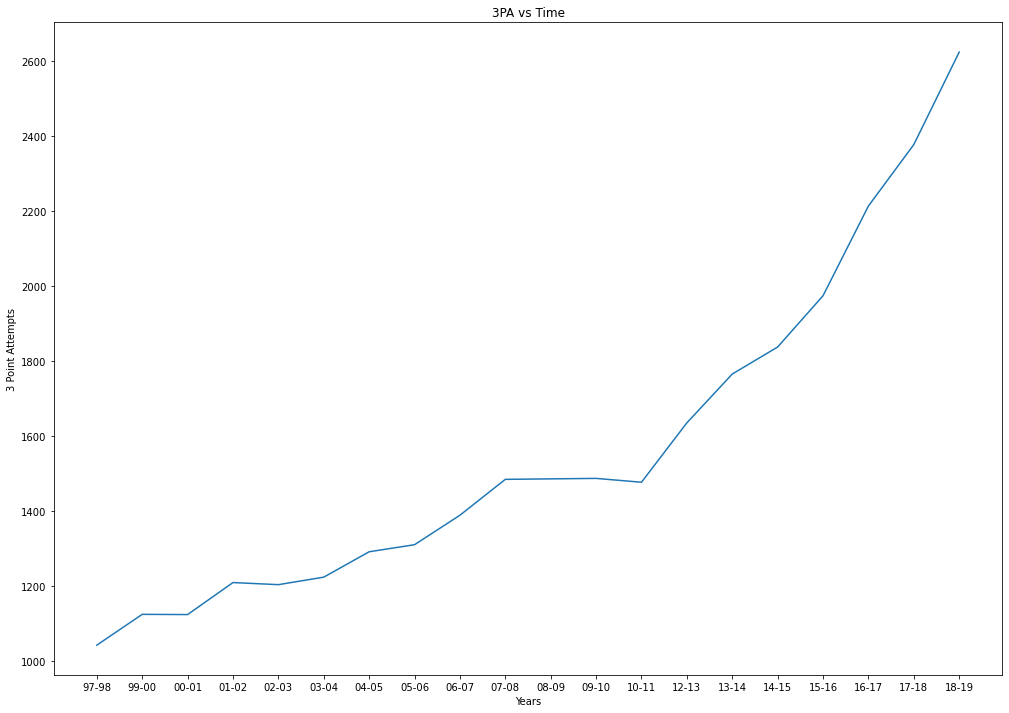

In [19]:
years = ['97-98', '99-00', '00-01', '01-02', '02-03', 
         '03-04', '04-05', '05-06', '06-07', '07-08', 
         '08-09', '09-10', '10-11', '12-13', '13-14', 
         '14-15', '15-16', '16-17', '17-18', '18-19']

ThreeptA = []
ThreeptA.append(table_97_98["3PA"].mean())
ThreeptA.append(table_99_00["3PA"].mean())
ThreeptA.append(table_00_01["3PA"].mean())
ThreeptA.append(table_01_02["3PA"].mean())
ThreeptA.append(table_02_03["3PA"].mean())
ThreeptA.append(table_03_04["3PA"].mean())
ThreeptA.append(table_04_05["3PA"].mean())
ThreeptA.append(table_05_06["3PA"].mean())
ThreeptA.append(table_06_07["3PA"].mean())
ThreeptA.append(table_07_08["3PA"].mean())
ThreeptA.append(table_08_09["3PA"].mean())
ThreeptA.append(table_09_10["3PA"].mean())
ThreeptA.append(table_10_11["3PA"].mean())
ThreeptA.append(table_12_13["3PA"].mean())
ThreeptA.append(table_13_14["3PA"].mean())
ThreeptA.append(table_14_15["3PA"].mean())
ThreeptA.append(table_15_16["3PA"].mean())
ThreeptA.append(table_16_17["3PA"].mean())
ThreeptA.append(table_17_18["3PA"].mean())
ThreeptA.append(table_18_19["3PA"].mean())

plt.figure(figsize=(17,12))
plt.plot(years, ThreeptA)
plt.title("3PA vs Time")
plt.xlabel("Years")
plt.ylabel("3 Point Attempts")
plt.show()

This line graph shown above plots the average 3 point attempts for all the teams combined each year from 1997-1998 season to the 2018-2019 season. It shows how the NBA was moving from more of a 2 point game to shooting more 3 pointers. It shows a linear growth of 3 point attempts growing from a little above an average of 1000 3 point attempts a year to 2007 to about 1500 attempts between 1997 and 2007. After this 10 year period, there is a 4 year time period of no increase, which is most likely because the league had shot so many more 3 pointers the years before. After 2011,  there was a sharp increase in 3 point attempts which is likely because of new players coming into the league who practiced shooting threes more and coaches probably copied other coaches' offensive strategies causing all the teams to average more. The rise of the Splash Brothers (Steph Curry and Klay Thompson) and James Harden, who all shot the most threes the league has ever seen, likely caused the slope of this graph to increase. This first graph does not show how well the teams were doing as a result of their emphasis on 3 point attempts.

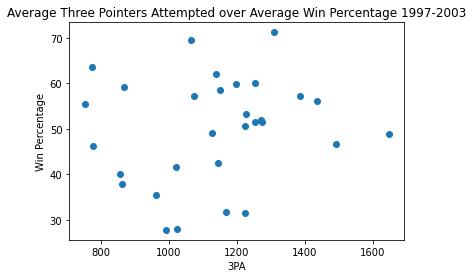

In [20]:
data_97_03 = {}
data_97_03['Memphis Grizzlies'] = []
data_97_03['New Orleans Hornets'] = []
for i, row in table_97_98.iterrows():
    data_97_03[row['Team']] = [row['3PA']]
    data_97_03[row['Team']].append(row['W%'])
    
for i, row in table_99_00.iterrows():
    data_97_03[row['Team']].append(row['3PA'])
    data_97_03[row['Team']].append(row['W%'])

for i, row in table_00_01.iterrows():
    data_97_03[row['Team']].append(row['3PA'])
    data_97_03[row['Team']].append(row['W%'])
    
for i, row in table_01_02.iterrows():
    data_97_03[row['Team']].append(row['3PA'])
    data_97_03[row['Team']].append(row['W%'])
    
for i, row in table_02_03.iterrows():
    data_97_03[row['Team']].append(row['3PA'])
    data_97_03[row['Team']].append(row['W%'])

final_97_03 = {}



for key, value in data_97_03.items():
    sum_3 = 0.0
    sum_w = 0.0
    counter = 0
    if key != 'Memphis Grizzlies' and key != 'New Orleans Hornets' and key != 'Vancouver Grizzlies':
        for i in value:
            if counter % 2 == 0:
                sum_3 += value[counter]
            else:
                sum_w += value[counter]
            counter +=1
        final_97_03[key] = [sum_3 / 5.0]
        final_97_03[key].append(sum_w / 5.0)
        
mem_data = data_97_03['Vancouver Grizzlies'] + data_97_03['Memphis Grizzlies']
final_97_03['Memphis Grizzlies'] = []
final_97_03['New Orleans Hornets'] = []
final_97_03['New Orleans Hornets'] = data_97_03['New Orleans Hornets']
sum_3 = 0.0
sum_w = 0.0
counter = 0
for i in mem_data:
    if counter % 2 == 0:
        sum_3 += mem_data[counter]
    else:
        sum_w += mem_data[counter]
    counter += 1
final_97_03['Memphis Grizzlies'].append(sum_3 / 5.0)
final_97_03['Memphis Grizzlies'].append(sum_w / 5.0)

x_val_97_03_att = []
y_val_97_03_att = []

for key, value in final_97_03.items():
    x_val_97_03_att.append(value[0])
    y_val_97_03_att.append(value[1])
    

plt.scatter(x_val_97_03_att, y_val_97_03_att)

plt.title("Average Three Pointers Attempted over Average Win Percentage 1997-2003")
plt.xlabel("3PA")
plt.ylabel("Win Percentage")
plt.show()

This scatter plot shows the the avearge 3 pointers attempted between 1997 and 2003 and graphs then compared to the average win percentage during the time period. We took into account the Memphis Grizzlies and New Orleans Hornets because they relocated or had new team names. The graph shows the win percentage was scattered and the teams that shot the most 3 pointers were about average during the time period.

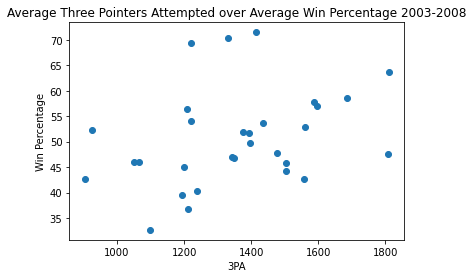

In [21]:
data_03_08 = {}
data_03_08['Charlotte Bobcats'] = []
data_03_08['New Orleans/Oklahoma City Hornets'] = []

for i, row in table_03_04.iterrows():
    data_03_08[row['Team']] = [row['3PA']]
    data_03_08[row['Team']].append(row['W%'])
    
for i, row in table_04_05.iterrows():
    data_03_08[row['Team']].append(row['3PA'])
    data_03_08[row['Team']].append(row['W%'])

for i, row in table_05_06.iterrows():
    data_03_08[row['Team']].append(row['3PA'])
    data_03_08[row['Team']].append(row['W%'])
    
for i, row in table_06_07.iterrows():
    data_03_08[row['Team']].append(row['3PA'])
    data_03_08[row['Team']].append(row['W%'])
    
for i, row in table_07_08.iterrows():
    data_03_08[row['Team']].append(row['3PA'])
    data_03_08[row['Team']].append(row['W%'])

final_03_08 = {}

for key, value in data_03_08.items():
    sum_3 = 0.0
    sum_w = 0.0
    counter = 0
    if key != 'Charlotte Hornets' and key != 'Charlotte Bobcats' and key != 'New Orleans/Oklahoma City Hornets'and key != 'New Orleans Hornets' and key != 'Vancouver Grizzlies':
        for i in value:
            if counter % 2 == 0:
                sum_3 += value[counter]
            else:
                sum_w += value[counter]
            counter +=1
        final_03_08[key] = [sum_3 / 5.0]
        final_03_08[key].append(sum_w / 5.0)
        

bob_data = data_03_08['Charlotte Bobcats']
final_03_08['Charlotte Bobcats'] = []
hor_data = data_03_08['New Orleans Hornets'] + data_03_08['New Orleans/Oklahoma City Hornets']
final_03_08['New Orleans Hornets'] = []

sum_3 = 0.0
sum_w = 0.0
counter = 0
for i in hor_data:
    if counter % 2 == 0:
        sum_3 += hor_data[counter]
    else:
        sum_w += hor_data[counter]
    counter += 1
final_03_08['New Orleans Hornets'].append(sum_3 / 5.0)
final_03_08['New Orleans Hornets'].append(sum_w / 5.0)


final_03_08['Charlotte Bobcats'].append(sum_3 / 4.0)
final_03_08['Charlotte Bobcats'].append(sum_w / 4.0)

x_val_03_08_att = []
y_val_03_08_att = []

for key, value in final_03_08.items():
    x_val_03_08_att.append(value[0])
    y_val_03_08_att.append(value[1])
    

plt.scatter(x_val_03_08_att, y_val_03_08_att)

plt.title("Average Three Pointers Attempted over Average Win Percentage 2003-2008")
plt.xlabel("3PA")
plt.ylabel("Win Percentage")
plt.show()

This scatter plot shows the the avearge 3 pointers attempted between 2003 and 2008 and graphs then compared to the average win percentage during the time period. We took into account the Charlotte Bobcats and Oklahoma City because they relocated or had new team names. The graph shows the win percentage was scattered and the teams that shot more 3 pointers had high win percentages during the time period but there were many teams that shot few threes but won many games.

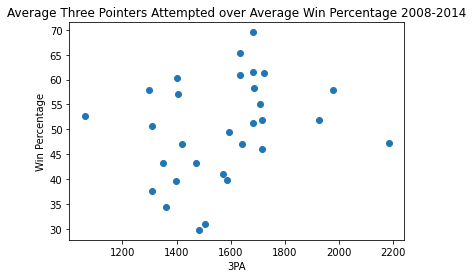

In [22]:
data_08_14 = {}
data_08_14['Brooklyn Nets'] = []
data_08_14['New Orleans Pelicans'] = []

for i, row in table_08_09.iterrows():
    data_08_14[row['Team']] = [row['3PA']]
    data_08_14[row['Team']].append(row['W%'])
    
for i, row in table_09_10.iterrows():
    data_08_14[row['Team']].append(row['3PA'])
    data_08_14[row['Team']].append(row['W%'])

for i, row in table_10_11.iterrows():
    data_08_14[row['Team']].append(row['3PA'])
    data_08_14[row['Team']].append(row['W%'])
    
for i, row in table_12_13.iterrows():
    data_08_14[row['Team']].append(row['3PA'])
    data_08_14[row['Team']].append(row['W%'])
    
for i, row in table_13_14.iterrows():
    data_08_14[row['Team']].append(row['3PA'])
    data_08_14[row['Team']].append(row['W%'])

final_08_14 = {}

for key, value in data_08_14.items():
    sum_3 = 0.0
    sum_w = 0.0
    counter = 0
    if key != 'New Jersey Nets' and key != 'Brooklyn Nets' and key != 'New Orleans Hornets' and key != 'New Orleans Pelicans':
        for i in value:
            if counter % 2 == 0:
                sum_3 += value[counter]
            else:
                sum_w += value[counter]
            counter +=1
        final_08_14[key] = [sum_3 / 5.0]
        final_08_14[key].append(sum_w / 5.0)
        
bro_data = data_08_14['New Jersey Nets'] + data_08_14['Brooklyn Nets']
final_08_14['Brooklyn Nets'] = []

sum_3 = 0.0
sum_w = 0.0
counter = 0
for i in bro_data:
    if counter % 2 == 0:
        sum_3 += bro_data[counter]
    else:
        sum_w += bro_data[counter]
    counter += 1
final_08_14['Brooklyn Nets'].append(sum_3 / 5.0)
final_08_14['Brooklyn Nets'].append(sum_w / 5.0)

new_data = data_08_14['New Orleans Hornets'] + data_08_14['New Orleans Pelicans']
final_08_14['New Orleans Pelicans'] = []

sum_3 = 0.0
sum_w = 0.0
counter = 0
for i in new_data:
    if counter % 2 == 0:
        sum_3 += new_data[counter]
    else:
        sum_w += new_data[counter]
    counter += 1
final_08_14['New Orleans Pelicans'].append(sum_3 / 5.0)
final_08_14['New Orleans Pelicans'].append(sum_w / 5.0)



x_val_08_14_att = []
y_val_08_14_att = []

for key, value in final_08_14.items():
    x_val_08_14_att.append(value[0])
    y_val_08_14_att.append(value[1])
    

plt.scatter(x_val_08_14_att, y_val_08_14_att)

plt.title("Average Three Pointers Attempted over Average Win Percentage 2008-2014")
plt.xlabel("3PA")
plt.ylabel("Win Percentage")
plt.show()

This scatter plot shows the the avearge 3 pointers attempted between 2008 and 2014 and graphs then compared to the average win percentage during the time period. We took into account the Brooklyn Nets and New Orleans Pelicans because they relocated or had new team names. The graph shows the amount of attempts ranging from about 1300 to 1800 with a few outliers. These outliers had similar win percentages, which means they likely they either had very high 2 point percentages or were average at shooting threes. The reason why some teams did poorly while averaging more 3 pointers was most likely because of their shot percentage.

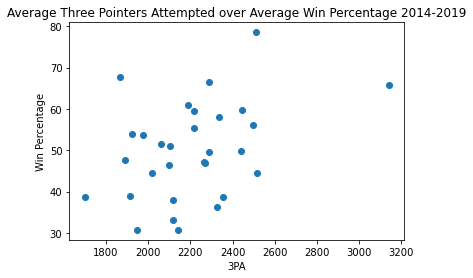

In [23]:
data_14_19 = {}

for i, row in table_14_15.iterrows():
    data_14_19[row['Team']] = [row['3PA']]
    data_14_19[row['Team']].append(row['W%'])
    
for i, row in table_15_16.iterrows():
    data_14_19[row['Team']].append(row['3PA'])
    data_14_19[row['Team']].append(row['W%'])

for i, row in table_16_17.iterrows():
    data_14_19[row['Team']].append(row['3PA'])
    data_14_19[row['Team']].append(row['W%'])
    
for i, row in table_17_18.iterrows():
    data_14_19[row['Team']].append(row['3PA'])
    data_14_19[row['Team']].append(row['W%'])
    
for i, row in table_18_19.iterrows():
    data_14_19[row['Team']].append(row['3PA'])
    data_14_19[row['Team']].append(row['W%'])

final_14_19 = {}



for key, value in data_14_19.items():
    sum_3 = 0.0
    sum_w = 0.0
    counter = 0
    if key != 'Vancouver Grizzlies':
        for i in value:
            if counter % 2 == 0:
                sum_3 += value[counter]
            else:
                sum_w += value[counter]
            counter +=1
        final_14_19[key] = [sum_3 / 5.0]
        final_14_19[key].append(sum_w / 5.0)
        


x_val_14_19_att = []
y_val_14_19_att = []

for key, value in final_14_19.items():
    x_val_14_19_att.append(value[0])
    y_val_14_19_att.append(value[1])
    

plt.scatter(x_val_14_19_att, y_val_14_19_att)

plt.title("Average Three Pointers Attempted over Average Win Percentage 2014-2019")
plt.xlabel("3PA")
plt.ylabel("Win Percentage")
plt.show()

This scatter plot shows the the avearge 3 pointers attempted between 2014 and 2019 and graphs then compared to the average win percentage during the time period. The graph shows the amount of attempts ranging from about 1800 to 2600 with a 2 outliers. The first outlier that is less than 1800 has one of the lowest win percentages and the the other which is nearly 3200 has one of the highest. It is clear from this graph that 3 point attempts drastically increased during this time period and it generally helps to shoot more 3 pointers.

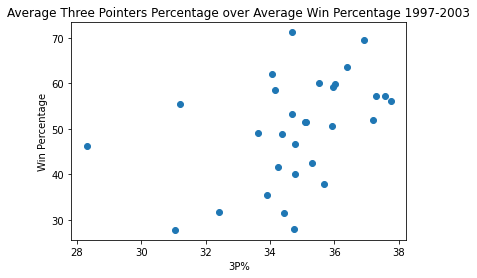

In [24]:
data_97_03 = {}
data_97_03['Memphis Grizzlies'] = []
data_97_03['New Orleans Hornets'] = []
for i, row in table_97_98.iterrows():
    data_97_03[row['Team']] = [(row['3P']/row['3PA'])*100]
    data_97_03[row['Team']].append(row['W%'])
    
for i, row in table_99_00.iterrows():
    data_97_03[row['Team']].append((row['3P']/row['3PA'])*100)
    data_97_03[row['Team']].append(row['W%'])

for i, row in table_00_01.iterrows():
    data_97_03[row['Team']].append((row['3P']/row['3PA'])*100)
    data_97_03[row['Team']].append(row['W%'])
    
for i, row in table_01_02.iterrows():
    data_97_03[row['Team']].append((row['3P']/row['3PA'])*100)
    data_97_03[row['Team']].append(row['W%'])
    
for i, row in table_02_03.iterrows():
    data_97_03[row['Team']].append((row['3P']/row['3PA'])*100)
    data_97_03[row['Team']].append(row['W%'])

final_97_03 = {}



for key, value in data_97_03.items():
    sum_3 = 0.0
    sum_w = 0.0
    counter = 0
    if key != 'Memphis Grizzlies' and key != 'New Orleans Hornets' and key != 'Vancouver Grizzlies':
        for i in value:
            if counter % 2 == 0:
                sum_3 += value[counter]
            else:
                sum_w += value[counter]
            counter +=1
        final_97_03[key] = [sum_3 / 5.0]
        final_97_03[key].append(sum_w / 5.0)
        
mem_data = data_97_03['Vancouver Grizzlies'] + data_97_03['Memphis Grizzlies']
final_97_03['Memphis Grizzlies'] = []
final_97_03['New Orleans Hornets'] = []
final_97_03['New Orleans Hornets'] = data_97_03['New Orleans Hornets']
sum_3 = 0.0
sum_w = 0.0
counter = 0
for i in mem_data:
    if counter % 2 == 0:
        sum_3 += mem_data[counter]
    else:
        sum_w += mem_data[counter]
    counter += 1
final_97_03['Memphis Grizzlies'].append(sum_3 / 5.0)
final_97_03['Memphis Grizzlies'].append(sum_w / 5.0)

x_val_97_03_per = []
y_val_97_03_per = []

for key, value in final_97_03.items():
    x_val_97_03_per.append(value[0])
    y_val_97_03_per.append(value[1])
    

plt.scatter(x_val_97_03_per, y_val_97_03_per)

plt.title("Average Three Pointers Percentage over Average Win Percentage 1997-2003")
plt.xlabel("3P%")
plt.ylabel("Win Percentage")
plt.show()

This scatter plot shows the the avearge 3 point percentage between 1997 and 2003 and graphs then compared to the average win percentage during the time period. The graph shows the teams with the lower win percentages generally had the worse 3 point percentages and the higher 3 point percentages had a better win percentage. 

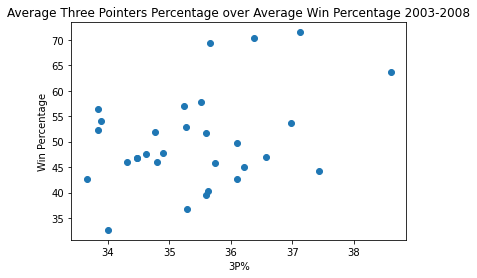

In [25]:
data_03_08 = {}
data_03_08['Charlotte Bobcats'] = []
data_03_08['New Orleans/Oklahoma City Hornets'] = []

for i, row in table_03_04.iterrows():
    data_03_08[row['Team']] = [(row['3P']/row['3PA'])*100]
    data_03_08[row['Team']].append(row['W%'])
    
for i, row in table_04_05.iterrows():
    data_03_08[row['Team']].append((row['3P']/row['3PA'])*100)
    data_03_08[row['Team']].append(row['W%'])

for i, row in table_05_06.iterrows():
    data_03_08[row['Team']].append((row['3P']/row['3PA'])*100)
    data_03_08[row['Team']].append(row['W%'])
    
for i, row in table_06_07.iterrows():
    data_03_08[row['Team']].append((row['3P']/row['3PA'])*100)
    data_03_08[row['Team']].append(row['W%'])
    
for i, row in table_07_08.iterrows():
    data_03_08[row['Team']].append((row['3P']/row['3PA'])*100)
    data_03_08[row['Team']].append(row['W%'])

final_03_08 = {}



for key, value in data_03_08.items():
    sum_3 = 0.0
    sum_w = 0.0
    counter = 0
    if key != 'Charlotte Hornets' and key != 'Charlotte Bobcats' and key != 'New Orleans/Oklahoma City Hornets'and key != 'New Orleans Hornets' and key != 'Vancouver Grizzlies':
        for i in value:
            if counter % 2 == 0:
                sum_3 += value[counter]
            else:
                sum_w += value[counter]
            counter +=1
        final_03_08[key] = [sum_3 / 5.0]
        final_03_08[key].append(sum_w / 5.0)
        


bob_data = data_03_08['Charlotte Bobcats']
final_03_08['Charlotte Bobcats'] = []
hor_data = data_03_08['New Orleans Hornets'] + data_03_08['New Orleans/Oklahoma City Hornets']
final_03_08['New Orleans Hornets'] = []


sum_3 = 0.0
sum_w = 0.0
counter = 0
for i in hor_data:
    if counter % 2 == 0:
        sum_3 += hor_data[counter]
    else:
        sum_w += hor_data[counter]
    counter += 1
final_03_08['New Orleans Hornets'].append(sum_3 / 5.0)
final_03_08['New Orleans Hornets'].append(sum_w / 5.0)


final_03_08['Charlotte Bobcats'].append(sum_3 / 5.0)
final_03_08['Charlotte Bobcats'].append(sum_w / 5.0)


x_val_03_08_per = []
y_val_03_08_per = []

for key, value in final_03_08.items():
    x_val_03_08_per.append(value[0])
    y_val_03_08_per.append(value[1])
    

plt.scatter(x_val_03_08_per, y_val_03_08_per)

plt.title("Average Three Pointers Percentage over Average Win Percentage 2003-2008")
plt.xlabel("3P%")
plt.ylabel("Win Percentage")
plt.show()

This scatter plot shows the the avearge 3 point percentage between 2003 and 2008 and graphs them compared to the average win percentage during the time period. The graph shows the improvement of each teams 3 point percentage as almost all the data points are showing the 3 point percentage in between 33% and 38%. The win percentage varied here but it shows that the teams were improving their 3 point shooting compared to the previous 5 years.

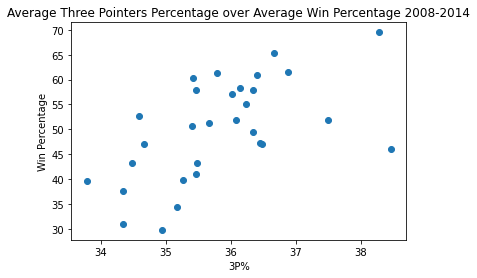

In [26]:
data_08_14 = {}
data_08_14['Brooklyn Nets'] = []
data_08_14['New Orleans Pelicans'] = []

for i, row in table_08_09.iterrows():
    data_08_14[row['Team']] = [(row['3P']/row['3PA'])*100]
    data_08_14[row['Team']].append(row['W%'])
    
for i, row in table_09_10.iterrows():
    data_08_14[row['Team']].append((row['3P']/row['3PA'])*100)
    data_08_14[row['Team']].append(row['W%'])

for i, row in table_10_11.iterrows():
    data_08_14[row['Team']].append((row['3P']/row['3PA'])*100)
    data_08_14[row['Team']].append(row['W%'])
    
for i, row in table_12_13.iterrows():
    data_08_14[row['Team']].append((row['3P']/row['3PA'])*100)
    data_08_14[row['Team']].append(row['W%'])
    
for i, row in table_13_14.iterrows():
    data_08_14[row['Team']].append((row['3P']/row['3PA'])*100)
    data_08_14[row['Team']].append(row['W%'])

final_08_14 = {}



for key, value in data_08_14.items():
    sum_3 = 0.0
    sum_w = 0.0
    counter = 0
    if key != 'New Jersey Nets' and key != 'Brooklyn Nets' and key != 'New Orleans Hornets' and key != 'New Orleans Pelicans':
        for i in value:
            if counter % 2 == 0:
                sum_3 += value[counter]
            else:
                sum_w += value[counter]
            counter +=1
        final_08_14[key] = [sum_3 / 5.0]
        final_08_14[key].append(sum_w / 5.0)
        
bro_data = data_08_14['New Jersey Nets'] + data_08_14['Brooklyn Nets']
final_08_14['Brooklyn Nets'] = []

sum_3 = 0.0
sum_w = 0.0
counter = 0
for i in bro_data:
    if counter % 2 == 0:
        sum_3 += bro_data[counter]
    else:
        sum_w += bro_data[counter]
    counter += 1
final_08_14['Brooklyn Nets'].append(sum_3 / 5.0)
final_08_14['Brooklyn Nets'].append(sum_w / 5.0)

new_data = data_08_14['New Orleans Hornets'] + data_08_14['New Orleans Pelicans']
final_08_14['New Orleans Pelicans'] = []

sum_3 = 0.0
sum_w = 0.0
counter = 0
for i in new_data:
    if counter % 2 == 0:
        sum_3 += new_data[counter]
    else:
        sum_w += new_data[counter]
    counter += 1
final_08_14['New Orleans Pelicans'].append(sum_3 / 5.0)
final_08_14['New Orleans Pelicans'].append(sum_w / 5.0)



x_val_08_14_per = []
y_val_08_14_per = []

for key, value in final_08_14.items():
    x_val_08_14_per.append(value[0])
    y_val_08_14_per.append(value[1])
    

plt.scatter(x_val_08_14_per, y_val_08_14_per)

plt.title("Average Three Pointers Percentage over Average Win Percentage 2008-2014")
plt.xlabel("3P%")
plt.ylabel("Win Percentage")
plt.show()

This scatter plot shows the the avearge 3 point percentage between 2008 and 2014 and graphs them compared to the average win percentage during the time period. The graph shows all the 3 point percentages are between ~34% and ~38%. It is noticeable that the worse 3 point shooting percentages have much worse win percentages. It also can been seen that the teams above 36% all had win percentages better than 47%.

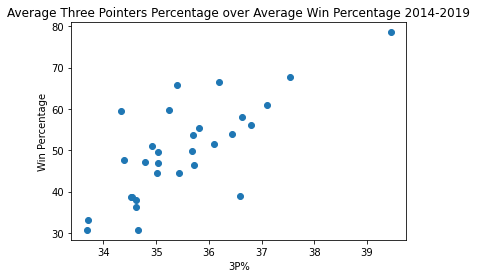

In [27]:
data_14_19 = {}

for i, row in table_14_15.iterrows():
    data_14_19[row['Team']] = [(row['3P']/row['3PA'])*100]
    data_14_19[row['Team']].append(row['W%'])
    
for i, row in table_15_16.iterrows():
    data_14_19[row['Team']].append((row['3P']/row['3PA'])*100)
    data_14_19[row['Team']].append(row['W%'])

for i, row in table_16_17.iterrows():
    data_14_19[row['Team']].append((row['3P']/row['3PA'])*100)
    data_14_19[row['Team']].append(row['W%'])
    
for i, row in table_17_18.iterrows():
    data_14_19[row['Team']].append((row['3P']/row['3PA'])*100)
    data_14_19[row['Team']].append(row['W%'])
    
for i, row in table_18_19.iterrows():
    data_14_19[row['Team']].append((row['3P']/row['3PA'])*100)
    data_14_19[row['Team']].append(row['W%'])

final_14_19 = {}



for key, value in data_14_19.items():
    sum_3 = 0.0
    sum_w = 0.0
    counter = 0
    if key != 'Vancouver Grizzlies':
        for i in value:
            if counter % 2 == 0:
                sum_3 += value[counter]
            else:
                sum_w += value[counter]
            counter +=1
        final_14_19[key] = [sum_3 / 5.0]
        final_14_19[key].append(sum_w / 5.0)
        


x_val_14_19_per = []
y_val_14_19_per = []

for key, value in final_14_19.items():
    x_val_14_19_per.append(value[0])
    y_val_14_19_per.append(value[1])
    

plt.scatter(x_val_14_19_per, y_val_14_19_per)

plt.title("Average Three Pointers Percentage over Average Win Percentage 2014-2019")
plt.xlabel("3P%")
plt.ylabel("Win Percentage")
plt.show()

This scatter plot shows the the avearge 3 point percentage between 2014 and 2019 and graphs then compared to the average win percentage during the time period. This graph shows a linear correlation between 3 point percentage and win percentage because as the 3 point percentage increases it is shown the win percentage also increases. The teams with the lowest 3 point percentages had the worst win percentages, while the best team which was the Golden State Warriors also had the highest 3 point percentage that was much better than every other team.

### Regression and Hypothesis Testing

In [28]:
x = np.array(x_val_14_19_per).reshape(-1,1)
y = np.array(y_val_14_19_per)

model = sm.OLS(y,x)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              693.5
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                    8.45e-22
Time:                        22:59:09   Log-Likelihood:                         -112.47
No. Observations:                  30   AIC:                                      226.9
Df Residuals:                      29   BIC:                                      228.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Hypothesis test:

H0: B1 = 0, Ha: B1 is not equal to 0

Test Statistic: t = 26.334

alpha level: 0.05

p value: 0.000

Conclusion: Since the p value is less than a, we can reject the null hypothesis and say with a 95% confidence level, that average three point percentage is a significant predictor for win percentage in the years of 2014-2019.

### Conclusion

After reviewing the data and models, we were able to get a good sense of the 3 point shot and how it has affected the success of teams in the NBA. Over the course of the history of the NBA, it has been clear NBA teams are shooting more 3 pointers than ever before. The strategy of the game is moving towards more 3 point attempts and is favoring players who shoot the ball at a higher percentage compared to the NBA in the 90s. In the last 5 years especially teams have significantly shot more 3 pointers. However, based on our models relating 3 point attempts to win percentage, there isn’t a clear correlation that shooting more 3’s will lead to a more successful season.

However, when we analyzed the correlation between 3 point percentage and win percentage, there was a correlation between the two. The 2014-2019 graph shows this correlation the best. This was also the years NBA teams shot the most amount of 3’s. Generally the higher percent a team shot from behind the arc led to more games won. 

The NBA isn’t just a shooting competition, half the game is defense and a lot of the points come from shots in the paint. Some of the data could also be skewed on how contested the shots attempted were. We estimate the 3 point shot will continue to be popular into the future.

### References and Further Readings

https://bleacherreport.com/articles/1715367

https://www.forbes.com/sites/shaneyoung/2019/11/30/the-nbas-three-point-revolution-continues-to-take-over/?sh=2b7958ad56b8

https://shottracker.com/articles/the-3-point-revolution

### Data

https://www.basketball-reference.com/leagues/NBA_stats_per_game.html